<a href="https://colab.research.google.com/github/rcarvajal208/MachineLearning_Retos/blob/master/Reto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Se importan las librerias a utilizar y el archivo que contiene los datos a evaluar


In [1]:
from sklearn import preprocessing, model_selection
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
files.upload()

{}

Se descargan los datos suministrados

In [2]:
vino = pd.read_csv('Reto3-winequality-white.csv',sep=';')
print(vino.head(None))

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.3

Acontinuacaión se hace el preprocesamiento de los datos. Para lo cual normalizamos los datos

In [0]:
x_multiple = preprocessing.normalize(np.array(vino.drop('quality',1)),)
y_multiple = np.array(vino['quality'])
x_prueba = x_multiple[0:2000]
y_prueba = y_multiple[0:2000]  
porcentajePrueba1 = 0.6
porcentajePrueba2 = 0.35
porcentajePrueba3 = 0.05 
x_entrenamiento1, x_prueba, y_entrenamiento1, y_prueba = model_selection.train_test_split(x_multiple,y_multiple,test_size=1-porcentajePrueba1)
x_entrenamiento2, x_sobrante1, y_entrenamiento2, y_sobrante1 = model_selection.train_test_split(x_entrenamiento1,y_entrenamiento1,test_size=1-porcentajePrueba2)
x_entrenamiento3, x_sobrante2, y_entrenamiento3, y_sobrante2 = model_selection.train_test_split(x_entrenamiento1,y_entrenamiento1,test_size=1-porcentajePrueba3) 

1.   En la función siguiente se presenta el algoritmo de desenso de gradiente estocastico, utilizando mini bash de un dato.
2.   en este algoritmo se establece que el criterio de parada esta dado por completar el número de iteraciones dado o tener un errror menor a la tolerancia dada.
3.   Igualmente la función es capaz de generar la grafica de como se comporta el error cuadratico a lo largo de cada ciclo de iteración






In [0]:
def entrenarRegreLineal(x,y,a,iterar,tol, titulo):
  nDatos, nColumnas = x.shape
  w1 = np.zeros(nColumnas+1)
  w = np.ones(nColumnas+1)*0.1
  error = 1000
  errorCuadratico = 0
  n = 1
  while (n<iterar and abs(error)>=tol):
    i = random.randrange(0,nDatos)
    xi = np.append(x[i],values=1)
    yi = y[i]
    g = sum(w*xi)
    error = (g-yi)
    w1 = w
    w = w1 - (a*error*xi)
    errorCuadratico = np.append(errorCuadratico,error*error/2)
    n += 1
  xplot = np.arange(0,n) 
  plt.plot(xplot,errorCuadratico)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(titulo)
  plt.show()
  return w 

Se crea una función que recibe los coeficientes w de la regresión lineal, para a partir de estos calcular la predicción de 'y' para el vector x

In [0]:
def RegreLineal(w, x):
  y = 0
  nDatos, nColumnas = x.shape
  n = 0
  while(n<nDatos):
    xi = np.append(x[n],values=1)
    g = sum(w*xi)
    y = np.append(y,g)
    n += 1
  return y

Se crean los vectores de entrenamiento de 2900 datos y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

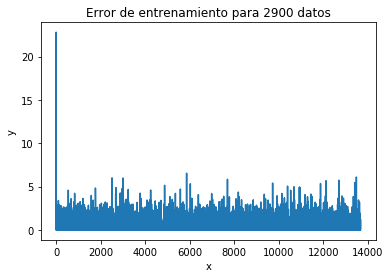

In [12]:
w = entrenarRegreLineal(x_entrenamiento1,y_entrenamiento1,0.1,len(y_entrenamiento1)*100,1e-5,'Error de entrenamiento para 2900 datos') 
y_regresion1 = RegreLineal(w,x_prueba)

Se crean los vectores de entrenamiento de 1000 datos y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

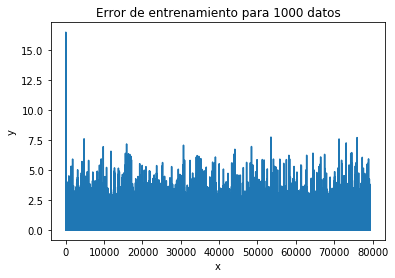

In [10]:
w = entrenarRegreLineal(x_entrenamiento2,y_entrenamiento2,0.1,len(y_entrenamiento2)*100,1e-5,'Error de entrenamiento para 1000 datos') 
y_regresion2 = RegreLineal(w,x_prueba)

Se crean los vectores de entrenamiento de 150 datos y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

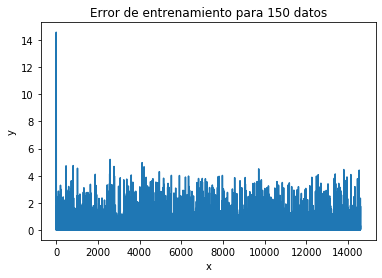

In [8]:
w = entrenarRegreLineal(x_entrenamiento3,y_entrenamiento3,0.1,len(y_entrenamiento3)*100,1e-5,'Error de entrenamiento para 150 datos') 
y_regresion3 = RegreLineal(w,x_prueba)

Finalmente se evalua el error empirico de cada uno de los tres conjuntos de datos utilizados

In [13]:
errores1 = 0
errores2 = 0
errores3 = 0
i = 0
for n in y_prueba:
  if(abs(n-y_regresion1[i])>1):
    errores1 = errores1+1
  if(abs(n-y_regresion2[i])>1):
    errores2 = errores2+1
  if(abs(n-y_regresion3[i])>1):
    errores3 = errores3+1
  i = i+1
print("Probabilidad de error para un conjuto de 2900 datos de entrenamiento: "+str(errores1/i))
print("Probabilidad de error para un conjuto de 1000 datos de entrenamiento: "+str(errores2/i))
print("Probabilidad de error para un conjuto de 150 datos de entrenamiento: "+str(errores3/i))

Probabilidad de error para un conjuto de 2900 datos de entrenamiento: 0.26632653061224487
Probabilidad de error para un conjuto de 1000 datos de entrenamiento: 0.3142857142857143
Probabilidad de error para un conjuto de 150 datos de entrenamiento: 0.3596938775510204


Por utlimo, se puede observar que el error empirico en efecto aumenta a medida que disminuimos el tamaño del conjunto de datos de entrenamiento.

Ahora bien, respecto al error de entrenamiento no se pudo observar ningun cambio relevante, ya que en sí la señal es muy ruidosa